In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
data = pd.read_csv('Advertising.csv')
df = pd.DataFrame(data = data)

In [3]:
df.head(5)

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
X = sm.add_constant(df[['TV', 'Radio', 'Newspaper']])
y = df['Sales']

/home/jack/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
X

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [6]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [7]:
model = sm.OLS(y, X).fit()

In [8]:
model.params

const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        23:23:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

In [12]:
model = sm.OLS(y_train, X_train).fit()

In [13]:
model.params

const        3.151527
TV           0.044696
Radio        0.187566
Newspaper   -0.000323
dtype: float64

In [14]:
pred_y = model.predict(X_test) 
pred_y

37     15.741313
109    19.610626
31     11.448889
89     17.008198
66      9.172857
119     7.012483
54     20.289925
74     17.299540
145     9.775845
142    19.221942
148    12.405032
112    13.892350
174    13.725411
55     21.287940
141    18.424566
149     9.981984
25     15.552290
34      7.689137
170     7.556150
39     20.403112
172     7.792152
153    18.242141
175    24.686319
61     22.821991
65      7.979621
50     12.652073
42     21.469259
129     8.052286
179    12.423160
2      12.507197
12     10.777578
133    19.244601
90     10.070269
22      6.707800
41     17.314921
32      7.767643
125     9.253933
196     8.278347
158    10.581056
180    10.635911
16     13.010026
186     9.771921
144    10.214699
121     8.045720
80     11.567107
18     10.083680
78      8.998066
48     16.253889
4      13.239423
15     20.814934
1      12.497274
43     13.966159
102    17.562851
164    11.145370
9      12.562615
155     5.508703
36     23.294651
190    12.624097
33     18.7740

### Perform Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [16]:
MAE = mean_absolute_error(y_test, pred_y)

In [17]:
MAE

1.2137457736144808

In [19]:
MAPE = mean_absolute_percentage_error(y_test, pred_y)

In [20]:
MAPE

0.11831359130546636

In [21]:
r2_score(y_test, pred_y)

0.9185780903322446

### Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [19]:
    #In Polynomial Regression, the manipulate with coefficient of X values. like below
    # x1, x2, x3,
    # x1^2, x1.x2, x1.x3
    # x2^2, x2.x3
    # x3^2
    # It is also called feature engineering. Because these are features(manupulation with coefficients) of the model
    #affect harder and make it closer to accuracy with less residuals and outliers.
poly_instance = PolynomialFeatures(degree=2, include_bias=True)

In [20]:
poly_instance.fit(X) 
# fit and transform are two stages of generating the new feature dataset
# fit is the first stage where the calc are just made ready

PolynomialFeatures()

In [31]:
poly_features = poly_instance.transform(X)
# transform will generate the actual columns with data

In [34]:
poly_features

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [35]:
# poly_features

In [28]:
X.shape

(200, 3)

In [29]:
poly_features.shape

(200, 10)

In [36]:
X = poly_features

In [37]:
X

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [32]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [33]:
model = sm.OLS(y, X).fit() # new X is poly features

In [34]:
model.params

const    5.084782
x1       0.051653
x2       0.021074
x3       0.006884
x4      -0.000110
x5       0.001105
x6      -0.000046
x7       0.000112
x8       0.000083
x9       0.000012
dtype: float64

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          1.72e-172
Time:                        16:49:05   Log-Likelihood:                -183.14
No. Observations:                 200   AIC:                             386.3
Df Residuals:                     190   BIC:                             419.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0848      0.239     21.279      0.000       4.613       5.556
x1             0.0517      0.002     22.997      0.000       0.047       0.056
x2             0.0211      0.013      1.675      0.096      -0.004       0.046
x3             0.0069      0.008      0.863      0.389      -0.009       0.023
x4            -0.0001   6.95e-06    -15.778      0.000      -0.000    -9.6e-05
x5             0.0011   3.81e-05     29.043      0.000       0.001       0.001
x6         -4.552e-05   2.38e-05     -1.915      0.057   -9.24e-05    1.37e-06
x7             0.0001      0.000      0.458      0.647      -0.000       0.001
x8          8.266e-05      0.000      0.486      0.628      -0.000       0.000
x9          1.191e-05   7.34e-05      0.162      0.871      -0.000       0.000
==============================================================================
Omnibus:                      145.912   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2613.928
Skew:                          -2.477   Prob(JB):                         0.00
Kurtosis:                      20.004   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)
# X here is poly_features

In [38]:
model = sm.OLS(y_train, X_train).fit()

In [39]:
model.params

const    5.125557
x1       0.051710
x2       0.013085
x3       0.012000
x4      -0.000111
x5       0.001142
x6      -0.000052
x7       0.000033
x8       0.000146
x9      -0.000030
dtype: float64

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1085.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          1.03e-117
Time:                        16:49:06   Log-Likelihood:                -124.30
No. Observations:                 140   AIC:                             268.6
Df Residuals:                     130   BIC:                             298.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1256      0.278     18.462      0.000       4.576       5.675
x1             0.0517      0.003     19.022      0.000       0.046       0.057
x2             0.0131      0.015      0.876      0.383      -0.016       0.043
x3             0.0120      0.010      1.205      0.230      -0.008       0.032
x4            -0.0001   8.53e-06    -13.002      0.000      -0.000    -9.4e-05
x5             0.0011   4.58e-05     24.928      0.000       0.001       0.001
x6         -5.241e-05    3.1e-05     -1.688      0.094      -0.000       9e-06
x7          3.349e-05      0.000      0.115      0.908      -0.001       0.001
x8             0.0001      0.000      0.749      0.455      -0.000       0.001
x9         -3.047e-05      0.000     -0.300      0.765      -0.000       0.000
==============================================================================
Omnibus:                      116.816   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2216.031
Skew:                          -2.656   Prob(JB):                         0.00
Kurtosis:                      21.753   Cond. No.                     2.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred_y = model.predict(X_test) 
pred_y

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [43]:
MAE = mean_absolute_error(y_test, pred_y)

In [44]:
MAE

0.4896798044802824

In [45]:
MAPE = mean_absolute_percentage_error(y_test, pred_y)

In [46]:
MAPE

0.05375511765332659

In [47]:
r2_score(y_test, pred_y)

0.9843529333146823

### Choosing the best degree of polynomial

In [40]:
data = pd.read_csv('Advertising.csv')
df = pd.DataFrame(data = data)

X = df.drop('Sales', axis=1)
Y = df['Sales']

In [41]:
train_mape_lst = []
test_mape_lst = []

for i in range(1, 10):
    
    poly_instance = PolynomialFeatures(degree=i, include_bias=False)
    
    poly_features = poly_instance.fit_transform(X) # creating new features
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, train_size=0.7, random_state=101)
       
    model = sm.OLS(y_train, X_train).fit()
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_lst.append(train_mape)
    test_mape_lst.append(test_mape)

In [42]:
train_mape_lst 

[0.18271670808463758,
 0.09042959947574905,
 0.05017552451316462,
 0.035095150437926555,
 0.02111649502210109,
 0.014017389532331677,
 0.03345511146549255,
 0.04525645878332403,
 0.04632434511027768]

In [43]:
test_mape_lst 

[0.13732614904047244,
 0.08561610718369646,
 0.050625485270853955,
 0.0365884002755129,
 0.0680057261866585,
 0.10776163046230479,
 5.845517470600404,
 265.5232910791406,
 3419.2593927790595]

In [44]:
pd.DataFrame({'train_mape': train_mape_lst,'test_mape': test_mape_lst})

,train_mape,test_mape
0,0.182717,0.137326
1,0.090430,0.085616
2,0.050176,0.050625
3,0.035095,0.036588
4,0.021116,0.068006
5,0.014017,0.107762
6,0.033455,5.845517
7,0.045256,265.523291
8,0.046324,3419.259393


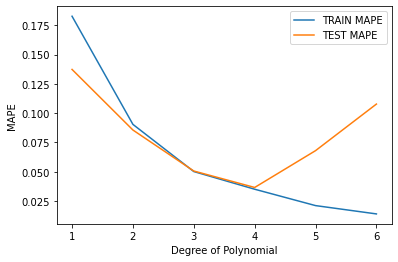

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(1,7), train_mape_lst[:6], label='TRAIN MAPE')
plt.plot(range(1,7), test_mape_lst[:6], label='TEST MAPE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MAPE')
plt.legend()
plt.show()


### Final Model

In [54]:
data = pd.read_csv('Advertising.csv')
df = pd.DataFrame(data = data)

X  = df.drop('Sales', axis=1)
Y = df['Sales']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
final_poly_instance =  PolynomialFeatures(degree=3, include_bias = False)
final_poly_features = final_poly_instance.fit_transform(X)
final_poly_features.shape

(200, 19)

In [56]:
final_model = sm.OLS(Y, final_poly_features).fit()

### Model Prediction using new observation

In [57]:
# TV, Radio, Newspaper
new_data = [[149, 22, 12]]

In [58]:
# convert the new data into a polynomial feature set
test_poly_features = final_poly_instance.fit_transform(new_data)

In [59]:
# test_poly_features.shape

In [60]:
result = final_model.predict(test_poly_features)

In [61]:
print(result)

[14.9141421]


In [62]:
final_model.params

x1     1.261988e-01
x2     2.198370e-01
x3     1.234717e-01
x4    -5.697323e-04
x5     5.323155e-04
x6    -6.190489e-04
x7    -2.906033e-03
x8    -4.495668e-03
x9    -3.366549e-04
x10    9.252401e-07
x11    4.185316e-09
x12    1.071802e-06
x13    6.915197e-06
x14    5.332985e-06
x15    5.431213e-07
x16    7.495736e-06
x17    4.436494e-05
x18    1.302445e-05
x19   -1.302743e-06
dtype: float64

### Residual Analysis

In [67]:
residuals = final_model.resid
residuals

0      1.117116
1     -0.432548
2      0.754175
3      0.065687
4     -0.194988
         ...   
195    1.572155
196    0.384720
197    0.286997
198   -0.411322
199    0.265808
Length: 200, dtype: float64

Text(0.5, 1.0, 'Normal P-P Plot of Regression Standardized Residuals')

<Figure size 576x1152 with 0 Axes>

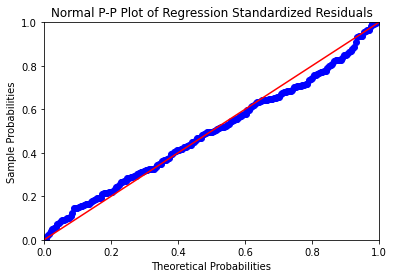

In [64]:
probplot = sm.ProbPlot(residuals)
plt.figure(figsize = (8, 16))
probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals')
# plt.show()

In [65]:
# Test for Constant Variance 

def standardize(vals):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized Residuals')

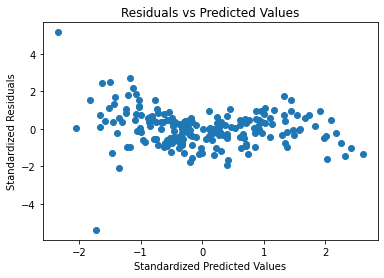

In [66]:
plt.scatter(standardize(final_model.fittedvalues), standardize(residuals))
plt.title('Residuals vs Predicted Values')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')